### Changing the inclination of the binary ###

In [1]:
import sys
!{sys.executable} -m pip install pycbc lalsuite ligo-common --no-cache-dir

Text(0, 0.5, 'Amplitude relative to face-on')

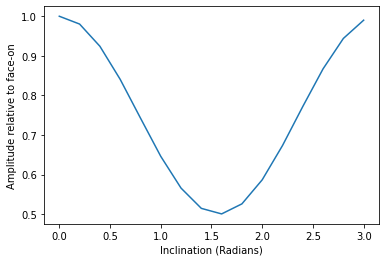

In [2]:
%matplotlib inline
import pylab, numpy
from pycbc.waveform import get_td_waveform

# Generate a gravitational waveform
peaks = []
inclinations = numpy.arange(0, numpy.pi, .2)
for inc in inclinations:
    hp, _ = get_td_waveform(approximant="SEOBNRv2",
                         mass1=20, mass2=20,
                         delta_t=1.0/1024, f_lower=50.0,
                         distance=100, 
                         inclination=inc)
    peaks.append(hp.max())
    
peaks = numpy.array(peaks)
peaks /= peaks.max()
pylab.plot(inclinations, peaks)
pylab.xlabel('Inclination (Radians)')
pylab.ylabel('Amplitude relative to face-on')

# A binary with inclination of 0 or PI is face-on or face-off
# I.E. If you were able to view it in the sky you would see the
# black orbitting each other in roughly a circle. Inclination of
# PI / 2 corresponds to a binary that is edge on from our viewing angle.

### What does the detector see for a source at a particular sky location?###

Text(0, 0.5, 'Strain')

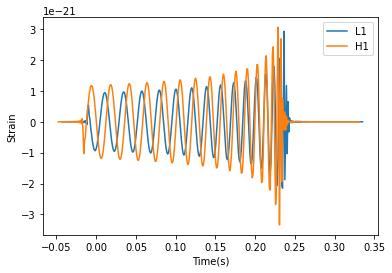

In [3]:
from pycbc.detector import Detector

# Generate the gravitation-wave polarizations
hp, hc = get_td_waveform(approximant="SEOBNRv2",
                         mass1=20, mass2=20,
                         delta_t=1.0/1024, f_lower=40.0,
                         distance=100, 
                         inclination=0)

# Map to how a detector would see the signal for a specific sky location
# and time
right_ascension = 1.7 # Radians
declination = 1.7 
polarization = 0
hp.start_time = hc.start_time = 0 # GPS seconds

# Calculate the straing that each of the LIGO detectors would observe
for name in ['L1', 'H1']:
    det = Detector(name)
    det_strain = det.project_wave(hp, hc, 
                                 right_ascension, declination,
                                 polarization)
    pylab.plot(det_strain.sample_times, det_strain, label=name)
pylab.legend()
pylab.xlabel('Time(s)')
pylab.ylabel('Strain')

# Notice that the strain in each detector is not the same. The time
# delay between detectors allow us to triangulate a source. The relative 
# amplitude and phase also contribute information about the sky location.

# Try other sky locations and see what happens!